## GNOD 1


### Lab | Web Scraping Single Page

#### Business goal:
Check the case_study_gnod.md file.

Make sure you've understood the big picture of your project:

- the goal of the company (Gnod),
- their current product (Gnoosic),
- their strategy, and
- how your project fits into this context.

Re-read the business case and the e-mail from the CTO, take a look at the flowchart and create an initial Trello board with the tasks you think you'll have to accomplish.





#### Instructions - Scraping popular songs
Your product will take a song as an input from the user and will output another song (the recommendation). In most cases, the recommended song will have to be similar to the inputted song, but the CTO thinks that if the song is on the top charts at the moment, the user will enjoy more a recommendation of a song that's also popular at the moment.

You have find data on the internet about currently popular songs. Billboard maintains a weekly Top 100 of "hot" songs here: https://www.billboard.com/charts/hot-100.

It's a good place to start! Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.




--> popvortex.com/music/charts/top-100-songs.php

In [1]:
# Libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random


In [2]:
url = 'https://www.popvortex.com/music/charts/top-100-songs.php'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
display(response.status_code)
#soup

200

In [4]:
# Artist Name // #chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > em

# Song title // #chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > cite

# genre // #chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(2) > a

# release date // #chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(3)

In [5]:
#soup.select("p")

In [6]:
soup.select("p cite")[0:10]

[<cite class="title">FLOWER</cite>,
 <cite class="title">Last Night</cite>,
 <cite class="title">Flowers</cite>,
 <cite class="title">Fast Car</cite>,
 <cite class="title">Thank God I Do</cite>,
 <cite class="title">Like Crazy (Deep House Remix)</cite>,
 <cite class="title">Calm Down</cite>,
 <cite class="title">Like Crazy (UK Garage Remix)</cite>,
 <cite class="title">Like Crazy (English Version)</cite>,
 <cite class="title">Like Crazy (Instrumental)</cite>]

In [7]:
soup.select("p em")[0:10]

[<em class="artist">JISOO</em>,
 <em class="artist">Morgan Wallen</em>,
 <em class="artist">Miley Cyrus</em>,
 <em class="artist">Luke Combs</em>,
 <em class="artist">Lauren Daigle</em>,
 <em class="artist">Jimin</em>,
 <em class="artist">Rema &amp; Selena Gomez</em>,
 <em class="artist">Jimin</em>,
 <em class="artist">Jimin</em>,
 <em class="artist">Jimin</em>]

In [8]:
soup.select("div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(2) > a")[0:10]

[<a href="/music/charts/top-kpop-songs.php">K-Pop</a>,
 <a href="/music/charts/top-kpop-songs.php">K-Pop</a>,
 <a href="/music/charts/top-kpop-songs.php">K-Pop</a>,
 <a href="/music/charts/top-kpop-songs.php">K-Pop</a>,
 <a href="/music/charts/top-pop-songs.php">Pop</a>,
 <a href="/music/charts/top-kpop-songs.php">K-Pop</a>,
 <a href="/music/charts/top-heavy-metal-songs.php">Heavy Metal</a>,
 <a href="/music/charts/top-rap-songs.php">Hip-Hop / Rap</a>,
 <a href="/music/charts/top-pop-songs.php">Pop</a>,
 <a href="/music/charts/top-alternative-songs.php">Alternative</a>]

In [9]:
soup.select ("div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(3)")[0:10]

[<li><strong>Release Date</strong>: March 31, 2023</li>,
 <li class="billboard-chart billboard-number-one">The current #1 hit song  in the U.S. on the <cite><a href="http://www.billboard.com/charts/hot-100" rel="noopener" target="_blank">Billboard Hot 100</a></cite> chart.<br/>2 weeks at #1.</li>,
 <li><strong>Release Date</strong>: March 26, 2023</li>,
 <li><strong>Release Date</strong>: March 26, 2023</li>,
 <li><strong>Release Date</strong>: March 26, 2023</li>,
 <li class="billboard-chart">Former #1 song on the <cite>Billboard Hot 100</cite> chart.</li>,
 <li><strong>Release Date</strong>: March 31, 2023</li>,
 <li><strong>Release Date</strong>: March 31, 2023</li>,
 <li><strong>Release Date</strong>: March 31, 2023</li>,
 <li><strong>Release Date</strong>: March 31, 2023</li>]

In [10]:
#Empty Lists
title = []
artist = []

# Iterations
num_iter = len(soup.select("p cite"))

title_song = soup.select("p cite")
artist_song = soup.select("p em")

for i in range(num_iter):
    title.append(title_song[i].get_text())
    artist.append(artist_song[i].get_text())
    
print(title[0:10])
print(artist[0:10])


#

print(len(title))
print(len(artist))
#print(len(genre))
#print(len(release_date))

['FLOWER', 'Last Night', 'Flowers', 'Fast Car', 'Thank God I Do', 'Like Crazy (Deep House Remix)', 'Calm Down', 'Like Crazy (UK Garage Remix)', 'Like Crazy (English Version)', 'Like Crazy (Instrumental)']
['JISOO', 'Morgan Wallen', 'Miley Cyrus', 'Luke Combs', 'Lauren Daigle', 'Jimin', 'Rema & Selena Gomez', 'Jimin', 'Jimin', 'Jimin']
100
100


In [11]:
# Columns of a dataframe
topsongs = pd.DataFrame({"title":title,
                       "artist":artist})

In [12]:
topsongs.to_csv('topsongs_data.csv')

In [13]:
display(topsongs.head(20), len(topsongs))

,title,artist
0,FLOWER,JISOO
1,Last Night,Morgan Wallen
2,Flowers,Miley Cyrus
3,Fast Car,Luke Combs
4,Thank God I Do,Lauren Daigle
5,Like Crazy (Deep House Remix),Jimin
6,Calm Down,Rema & Selena Gomez
7,Like Crazy (UK Garage Remix),Jimin
8,Like Crazy (English Version),Jimin
9,Like Crazy (Instrumental),Jimin


100

## GNOD 2

The first steps you took yesterday, were to create a list of Top Songs and Artists from scraping web sites.


You should have ended with your lists in a data frame containing at least Song Title and Artist.


Today you are creating a recommender where the user inputs a song title and check if that song is in the list you created.   If it is,  give a different random song and artist from the list.  If it is not on the list, let the user know that you have no recommendation at this time.


In [14]:
# Previous dataframe
topsongs.head(5)

,title,artist
0,FLOWER,JISOO
1,Last Night,Morgan Wallen
2,Flowers,Miley Cyrus
3,Fast Car,Luke Combs
4,Thank God I Do,Lauren Daigle


In [15]:
import random
from IPython.display import Markdown, display  # library to display in bolt letters, etc

def similar_top100(topsongs, song_searched):
    
    # Converting both input value and 'title' in lower case
    song_searched = song_searched.lower() 
    topsongs['title'] = topsongs['title'].str.lower()
    
    # IF song in the input IS IN the 'title column'
    if song_searched in topsongs['title'].values:
        # While song in input IS different from the recommended (output)
        while True:
            # Generating a random number to select another song from the list
            random_num = random.randint(0, len(topsongs)-1)
            # Picking the song 'title' with random_num index
            song_recommended_title = topsongs.iloc[random_num]['title']
            # Getting also the artist name 
            song_recommended_artist = topsongs.iloc[random_num]['artist']
            # If recommended song IS NOT the same as the searched one, stop the while
            if song_recommended_title != song_searched:
                break
        # Capitalizing first letters of 'title' (.title())
        song_recommended_title = song_recommended_title.title()
        # Joinning song and artist to display in the output
        song_recommended = f"{song_recommended_title} by {song_recommended_artist}"
        # Displaying output with both 'title' and 'artist' bigger and bolt style.
        display(Markdown(f"You should listen to: **{song_recommended}**!"))
    
    # If song in the input IS NOT in 'title column'
    else:
        print("Sorry, you have very bad musical taste. Try another one...")

In [16]:
# Input
song_searched = input("Introduce the name of a song: ")
# Applying function
similar_top100(topsongs,song_searched)


Introduce the name of a song: Fix you
Sorry, you have very bad musical taste. Try another one...


## GNOD 3

### Lab | API wrappers - Create your collection of songs & audio features

To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!



These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.



The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!


In [17]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#### Authentification

secrets_file = open("secrets.txt","r")
string = secrets_file.read()
#string.split('\n')

# Dictionary
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0: # excluding empty lines
        #           [first element:key]  [ second element:value  ]
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()


#### Authentication with secrets text file

In [18]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))


#### Playlists selected from Spotify

In [19]:
# Top 2000 (1999): 37i9dQZF1DWTmvXBN4DgpA
# Top 5000 (2705) - private: 5DPT4gtwr5AeFlf3YVvdmK
# Top 5000 (3318) - private: 4RVf1hHtwvMEED3yuCNi8q
# Best Music of all times (1723): 1BHsIy6qBuhJVzys6nr2uo

#### Audio features

In [20]:
# List of playlists id
playlist_id = ['37i9dQZF1DWTmvXBN4DgpA',
               '5DPT4gtwr5AeFlf3YVvdmK',
               '4RVf1hHtwvMEED3yuCNi8q'],
              # '1BHsIy6qBuhJVzys6nr2uo']


In [21]:
playlist1 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWTmvXBN4DgpA")
playlist2 = sp.user_playlist_tracks("spotify", "5DPT4gtwr5AeFlf3YVvdmK")
playlist3 = sp.user_playlist_tracks("spotify", "4RVf1hHtwvMEED3yuCNi8q")
#playlist4 = sp.user_playlist_tracks("spotify", "1BHsIy6qBuhJVzys6nr2uo")


display(type(playlist1), playlist1['total'])
display(type(playlist2), playlist2['total'])
display(type(playlist3), playlist3['total'])
#display(type(playlist4), playlist4['total'])

dict

1999

dict

2705

dict

3318

In [22]:
#playlist1

In [23]:
# Checking the path to get 'title', 'artist' and 'uri'
display(playlist1["items"][0]["track"]["name"]) # title
display(playlist1["items"][0]["track"]["artists"][0]["name"]) # artist
display(playlist1["items"][0]["track"]["uri"]) # uri

'Bohemian Rhapsody - Remastered 2011'

'Queen'

'spotify:track:7tFiyTwD0nx5a1eklYtX2J'

#### Retrieving all data from playlists and creating a new dataframe


In [24]:
# List of playlists
playlists_list = ["playlist1","playlist2","playlist3"] #,"playlist4"]


In [25]:
# Function to retrieve ALL data of "title", "artist", and "uri" 's id and metrics
# from the playlist dict and convert all them into columns of a new dataframe dataframe

def create_playlist_dataframe(playlist, sp):
    # List of items in track
    tracks = []
    
    # While there is a next page of results in the playlist
    while playlist:
        # For each item in playlist:
        for item in playlist['items']:
            # Look for uri and save id and get values in features
            song_uri = item['track']['uri']
            features = sp.audio_features(song_uri)[0]
            
            # New dict retrieving values of 'title', 'artist' and 'uri' (id)
            track = {
                'title': item['track']['name'],
                'artist': item['track']['artists'][0]['name'],
                'uri': song_uri,
            }
            
            # For each feature (song uri) add in track dict
            # new key (column name) and the value
            for feature_key, feature_value in features.items():
                track[feature_key] = feature_value
                
            # Append each item in track
            tracks.append(track)
        
        # Get the next page of results
        playlist = sp.next(playlist)
        
        # Sleep for a random time between 1 and 3 seconds to avoid triggering rate limits
        sleep_time = random.randint(1, 3)
        time.sleep(sleep_time)
    
    # Return the results as a DataFrame
    return pd.DataFrame(tracks)


In [26]:
# Applying the function
playlist1_df = create_playlist_dataframe(playlist1, sp)

In [27]:
display(playlist1_df.head(5), playlist1_df.shape)

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Bohemian Rhapsody - Remastered 2011,Queen,spotify:track:7tFiyTwD0nx5a1eklYtX2J,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,audio_features,7tFiyTwD0nx5a1eklYtX2J,https://api.spotify.com/v1/tracks/7tFiyTwD0nx5...,https://api.spotify.com/v1/audio-analysis/7tFi...,354320,4
1,Roller Coaster,Danny Vera,spotify:track:5B5YKjgne3TZzNpMsN9aj1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,audio_features,5B5YKjgne3TZzNpMsN9aj1,https://api.spotify.com/v1/tracks/5B5YKjgne3TZ...,https://api.spotify.com/v1/audio-analysis/5B5Y...,269986,4
2,Hotel California - 2013 Remaster,Eagles,spotify:track:40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,audio_features,40riOy7x9W7GXjyGp4pjAv,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,https://api.spotify.com/v1/audio-analysis/40ri...,391376,4
3,Piano Man,Billy Joel,spotify:track:3FCto7hnn1shUyZL42YgfO,0.334,0.472,0,-8.791,1,0.0277,0.60000,0.000004,0.3170,0.431,179.173,audio_features,3FCto7hnn1shUyZL42YgfO,https://api.spotify.com/v1/tracks/3FCto7hnn1sh...,https://api.spotify.com/v1/audio-analysis/3FCt...,336093,3
4,Fix You,Coldplay,spotify:track:7LVHVU3tWfcxj5aiPFEW4Q,0.209,0.417,3,-8.740,1,0.0338,0.16400,0.001960,0.1130,0.124,138.178,audio_features,7LVHVU3tWfcxj5aiPFEW4Q,https://api.spotify.com/v1/tracks/7LVHVU3tWfcx...,https://api.spotify.com/v1/audio-analysis/7LVH...,295533,4


(1999, 20)

In [28]:
# Applying the function
playlist2_df = create_playlist_dataframe(playlist2, sp)

In [29]:
display(playlist2_df.head(5), playlist2_df.shape)

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Rhapsody in Blue,George Gershwin,spotify:track:0yzhOPf0iw2qWwcXRRta5L,0.309,0.258,9,-15.327,1,0.0459,0.976,0.690000,0.0924,0.115,74.568,audio_features,0yzhOPf0iw2qWwcXRRta5L,https://api.spotify.com/v1/tracks/0yzhOPf0iw2q...,https://api.spotify.com/v1/audio-analysis/0yzh...,890000,4
1,Summertime,Billie Holiday,spotify:track:62Xj6x2LSWv47PtRAXrg5Z,0.628,0.226,10,-14.075,0,0.0371,0.903,0.000006,0.1710,0.608,99.392,audio_features,62Xj6x2LSWv47PtRAXrg5Z,https://api.spotify.com/v1/tracks/62Xj6x2LSWv4...,https://api.spotify.com/v1/audio-analysis/62Xj...,173493,4
2,Moonlight Serenade - 2005 Remastered Version,Glenn Miller,spotify:track:3HRMOZk689zaR3z6NpEdfu,0.228,0.263,3,-10.120,1,0.0275,0.896,0.317000,0.1030,0.224,83.903,audio_features,3HRMOZk689zaR3z6NpEdfu,https://api.spotify.com/v1/tracks/3HRMOZk689za...,https://api.spotify.com/v1/audio-analysis/3HRM...,204240,4
3,In the Mood - Live,Glenn Miller,spotify:track:54h1RKrrFJDsNOfhwmqu9o,0.463,0.654,8,-9.720,1,0.0659,0.824,0.917000,0.3720,0.592,175.204,audio_features,54h1RKrrFJDsNOfhwmqu9o,https://api.spotify.com/v1/tracks/54h1RKrrFJDs...,https://api.spotify.com/v1/audio-analysis/54h1...,209573,4
4,"Take the ""A"" Train",Duke Ellington,spotify:track:6KBsivP3Of4z2x6uNMAyE3,0.479,0.318,0,-13.836,1,0.0395,0.278,0.095900,0.1070,0.575,94.036,audio_features,6KBsivP3Of4z2x6uNMAyE3,https://api.spotify.com/v1/tracks/6KBsivP3Of4z...,https://api.spotify.com/v1/audio-analysis/6KBs...,331800,4


(2705, 20)

In [30]:
# Applying the function
playlist3_df = create_playlist_dataframe(playlist3, sp)

In [31]:
display(playlist3_df.head(5), playlist3_df.shape)

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Angie - Remastered 2009,The Rolling Stones,spotify:track:35RUp1t6MVhcG8cOK5BH6x,0.429,0.548,9,-6.017,0,0.0294,0.7000,0.000075,0.0836,0.383,138.619,audio_features,35RUp1t6MVhcG8cOK5BH6x,https://api.spotify.com/v1/tracks/35RUp1t6MVhc...,https://api.spotify.com/v1/audio-analysis/35RU...,271973,4
1,Billie Jean,Michael Jackson,spotify:track:5ChkMS8OtdzJeqyybCc9R5,0.920,0.654,11,-3.051,0,0.0401,0.0236,0.015300,0.0360,0.847,117.046,audio_features,5ChkMS8OtdzJeqyybCc9R5,https://api.spotify.com/v1/tracks/5ChkMS8OtdzJ...,https://api.spotify.com/v1/audio-analysis/5Chk...,293827,4
2,Hey Jude - Remastered 2015,The Beatles,spotify:track:0aym2LBJBk9DAYuHHutrIl,0.386,0.607,10,-7.700,1,0.0261,0.0112,0.000014,0.0880,0.532,147.207,audio_features,0aym2LBJBk9DAYuHHutrIl,https://api.spotify.com/v1/tracks/0aym2LBJBk9D...,https://api.spotify.com/v1/audio-analysis/0aym...,425653,4
3,Purple Rain,Prince,spotify:track:3lUjT0JcV1PcuugwMl2MQj,0.367,0.452,10,-10.422,1,0.0307,0.0353,0.002280,0.6890,0.189,113.066,audio_features,3lUjT0JcV1PcuugwMl2MQj,https://api.spotify.com/v1/tracks/3lUjT0JcV1Pc...,https://api.spotify.com/v1/audio-analysis/3lUj...,520787,4
4,I Heard It Through The Grapevine - Single Vers...,Marvin Gaye,spotify:track:6ca3m7gXDEfgLop4A51mWt,0.722,0.450,3,-7.503,0,0.0396,0.1990,0.000003,0.0739,0.664,118.447,audio_features,6ca3m7gXDEfgLop4A51mWt,https://api.spotify.com/v1/tracks/6ca3m7gXDEfg...,https://api.spotify.com/v1/audio-analysis/6ca3...,192267,4


(3318, 20)

In [32]:
# Applying the function
#playlist4_df = create_playlist_dataframe(playlist4, sp)

In [33]:
#display(playlist4_df.head(5), playlist4_df.shape)

#### Checking if df are ready for concatenation

In [34]:
df_list = ["playlist1_df","playlist2_df","playlist3_df"]

In [35]:
# Checking same names and order for each dataframe's columns
display(playlist1_df.columns == playlist2_df.columns,
        playlist1_df.columns == playlist3_df.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [36]:
# Information about their shape
display(playlist1_df.shape, playlist3_df.shape, playlist3_df.shape)

(1999, 20)

(3318, 20)

(3318, 20)

#### Concatenating dataframes

In [37]:
# Concatenating in axis=0 (rows)
spotify_data = pd.concat([playlist1_df, playlist2_df, playlist3_df], axis = 0)

In [38]:
spotify_data = spotify_data.reset_index(drop=True)

In [39]:
display(spotify_data.head(5), spotify_data.tail(5), spotify_data.shape)

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Bohemian Rhapsody - Remastered 2011,Queen,spotify:track:7tFiyTwD0nx5a1eklYtX2J,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,audio_features,7tFiyTwD0nx5a1eklYtX2J,https://api.spotify.com/v1/tracks/7tFiyTwD0nx5...,https://api.spotify.com/v1/audio-analysis/7tFi...,354320,4
1,Roller Coaster,Danny Vera,spotify:track:5B5YKjgne3TZzNpMsN9aj1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,audio_features,5B5YKjgne3TZzNpMsN9aj1,https://api.spotify.com/v1/tracks/5B5YKjgne3TZ...,https://api.spotify.com/v1/audio-analysis/5B5Y...,269986,4
2,Hotel California - 2013 Remaster,Eagles,spotify:track:40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,audio_features,40riOy7x9W7GXjyGp4pjAv,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,https://api.spotify.com/v1/audio-analysis/40ri...,391376,4
3,Piano Man,Billy Joel,spotify:track:3FCto7hnn1shUyZL42YgfO,0.334,0.472,0,-8.791,1,0.0277,0.60000,0.000004,0.3170,0.431,179.173,audio_features,3FCto7hnn1shUyZL42YgfO,https://api.spotify.com/v1/tracks/3FCto7hnn1sh...,https://api.spotify.com/v1/audio-analysis/3FCt...,336093,3
4,Fix You,Coldplay,spotify:track:7LVHVU3tWfcxj5aiPFEW4Q,0.209,0.417,3,-8.740,1,0.0338,0.16400,0.001960,0.1130,0.124,138.178,audio_features,7LVHVU3tWfcxj5aiPFEW4Q,https://api.spotify.com/v1/tracks/7LVHVU3tWfcx...,https://api.spotify.com/v1/audio-analysis/7LVH...,295533,4


,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
8017,Jambalaya (On The Bayou),John Fogerty,spotify:track:6389cBCT7TWS2Nx0KVsjrk,0.742,0.756,2,-10.121,1,0.0262,0.6240,0.000130,0.0800,0.977,98.568,audio_features,6389cBCT7TWS2Nx0KVsjrk,https://api.spotify.com/v1/tracks/6389cBCT7TWS...,https://api.spotify.com/v1/audio-analysis/6389...,197760,4
8018,Hearts Of Stone,John Fogerty,spotify:track:2uJVtJd1w2N8vg6pJmaNdN,0.412,0.677,6,-10.763,1,0.0376,0.5370,0.006640,0.1210,0.853,205.922,audio_features,2uJVtJd1w2N8vg6pJmaNdN,https://api.spotify.com/v1/tracks/2uJVtJd1w2N8...,https://api.spotify.com/v1/audio-analysis/2uJV...,134000,4
8019,Rock and Roll Girls,John Fogerty,spotify:track:5DeuAlTIDflXOomztXYM5D,0.794,0.730,7,-6.067,1,0.0332,0.0538,0.000832,0.0826,0.767,128.999,audio_features,5DeuAlTIDflXOomztXYM5D,https://api.spotify.com/v1/tracks/5DeuAlTIDflX...,https://api.spotify.com/v1/audio-analysis/5Deu...,206640,4
8020,Rockin' All Over The World,John Fogerty,spotify:track:2X0fwXZpoAbVZdyFVjJOUm,0.539,0.909,2,-6.546,1,0.0423,0.5180,0.000394,0.5580,0.964,130.821,audio_features,2X0fwXZpoAbVZdyFVjJOUm,https://api.spotify.com/v1/tracks/2X0fwXZpoAbV...,https://api.spotify.com/v1/audio-analysis/2X0f...,173000,4
8021,Walking on the Chinese Wall,Philip Bailey,spotify:track:0PXHA9nXcu4UOJFXvye9LE,0.488,0.862,1,-7.653,0,0.0340,0.1690,0.025500,0.1780,0.497,169.956,audio_features,0PXHA9nXcu4UOJFXvye9LE,https://api.spotify.com/v1/tracks/0PXHA9nXcu4U...,https://api.spotify.com/v1/audio-analysis/0PXH...,308773,4


(8022, 20)

#### Saving df to csv file

In [40]:
spotify_data.to_csv('spotify_data.csv')

## GNOD 4

### Lab | Unsupervised learning intro

It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.



The experiments you did with the Spotify API and the PopVortex web scraping will allow you to create a pipeline such that when the user enters a song, you:



- Check whether or not the song is in the PopVortex Hot 100.
- Collect the audio features from the Spotify API.



After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.



We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import Markdown, display

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import cluster, datasets
from sklearn.cluster import KMeans

import random
from IPython.display import Markdown, display 

import pickle

In [3]:
spotify_data = pd.read_csv('spotify_data.csv')

#### Selecting features to cluster from main dataframe

In [4]:
spotify_data.shape

(8026, 21)

In [5]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8026 entries, 0 to 8025
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8026 non-null   int64  
 1   title             8026 non-null   object 
 2   artist            8026 non-null   object 
 3   uri               8026 non-null   object 
 4   danceability      8026 non-null   float64
 5   energy            8026 non-null   float64
 6   key               8026 non-null   int64  
 7   loudness          8026 non-null   float64
 8   mode              8026 non-null   int64  
 9   speechiness       8026 non-null   float64
 10  acousticness      8026 non-null   float64
 11  instrumentalness  8026 non-null   float64
 12  liveness          8026 non-null   float64
 13  valence           8026 non-null   float64
 14  tempo             8026 non-null   float64
 15  type              8026 non-null   object 
 16  id                8026 non-null   object 


In [6]:
spotify_data.head(2)

,Unnamed: 0,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,0,Bohemian Rhapsody - Remastered 2011,Queen,spotify:track:7tFiyTwD0nx5a1eklYtX2J,0.392,0.402,0,-9.961,0,0.0536,...,0.0000,0.243,0.228,143.883,audio_features,7tFiyTwD0nx5a1eklYtX2J,https://api.spotify.com/v1/tracks/7tFiyTwD0nx5...,https://api.spotify.com/v1/audio-analysis/7tFi...,354320,4
1,1,Roller Coaster,Danny Vera,spotify:track:5B5YKjgne3TZzNpMsN9aj1,0.401,0.383,9,-10.048,1,0.0279,...,0.0078,0.121,0.285,96.957,audio_features,5B5YKjgne3TZzNpMsN9aj1,https://api.spotify.com/v1/tracks/5B5YKjgne3TZ...,https://api.spotify.com/v1/audio-analysis/5B5Y...,269986,4


In [7]:
# Dropping 'Unnamed: 0' column
spotify_data = spotify_data.drop(['Unnamed: 0'], axis = 1)

# All NUMERICAL columns AFTER 'uri' are the features to be taken
features = spotify_data.select_dtypes(np.number)

display(type(features),features.head(3), features.shape, features.columns)

pandas.core.frame.DataFrame

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,354320,4
1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,269986,4
2,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,391376,4


(8026, 13)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

#### Clustering features with K-Means

##### X (data with no target)

In [8]:
X = features

##### Scaling X data (not training!)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_prep = scaler.transform(X)

#X_prep = StandardScaler().fit_transform(X)

#Checking tranformation
pd.DataFrame(X_prep,columns=X.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.100045,-0.984958,-1.461339,-0.185090,-1.590429,0.101740,-0.017943,-0.301487,0.321418,-1.410197,0.898039,1.229693,0.228237
1,-1.042185,-1.075615,1.072346,-0.210413,0.628761,-0.526360,0.790864,-0.248259,-0.416255,-1.185278,-0.848111,0.266561,0.228237
2,0.102157,-0.479187,-0.898298,-0.046250,0.628761,-0.548356,-1.046293,-0.298116,-0.800208,0.093212,1.018676,1.652889,0.228237
3,-1.472920,-0.650958,-1.461339,0.155462,0.628761,-0.531248,1.118759,-0.301463,0.768859,-0.609168,2.211205,1.021533,-3.002504
4,-2.276531,-0.913387,-0.616778,0.170306,0.628761,-0.382166,-0.469709,-0.288112,-0.464627,-1.820577,0.685752,0.558320,0.228237


In [10]:
with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)

##### Choosing k (defining best number of clusters) // Elbow and Silhouette

###### Elbow

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

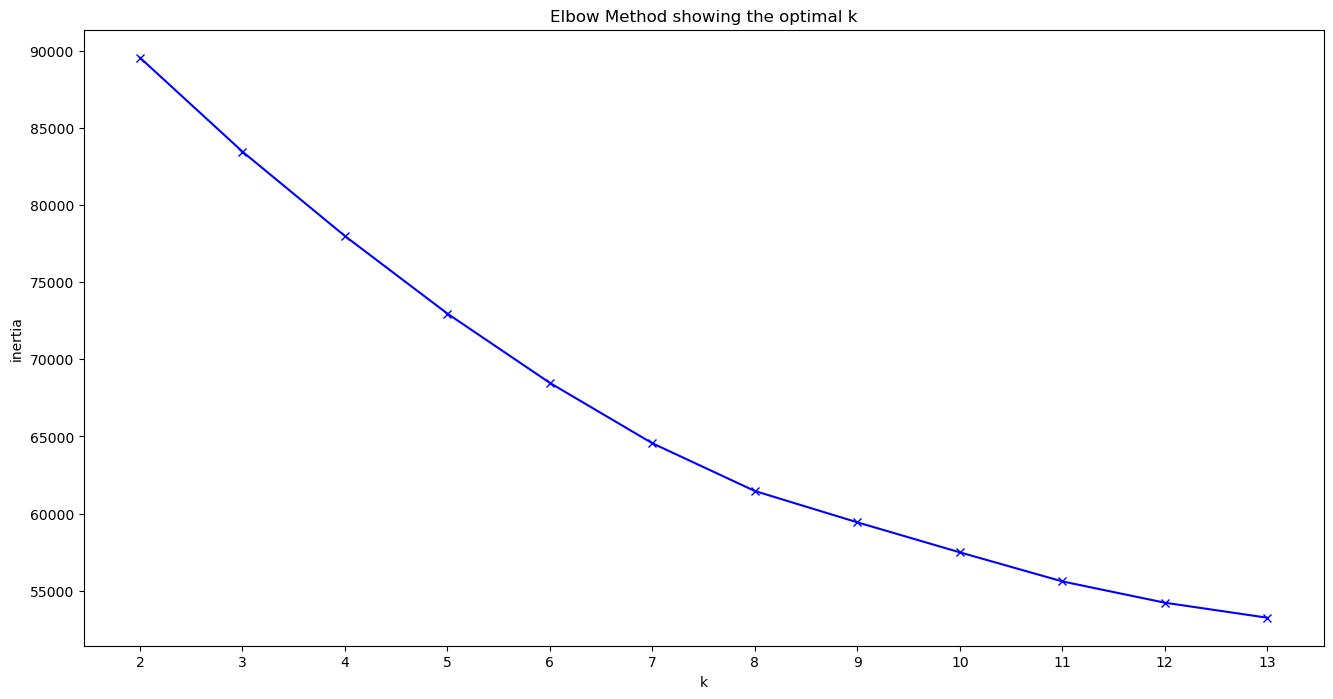

In [11]:
# As we have 13 features, set range (2-14)

K = range(2, 14)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

- Difficult to assess the elbow point, but seems 8

###### Silhouette score

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

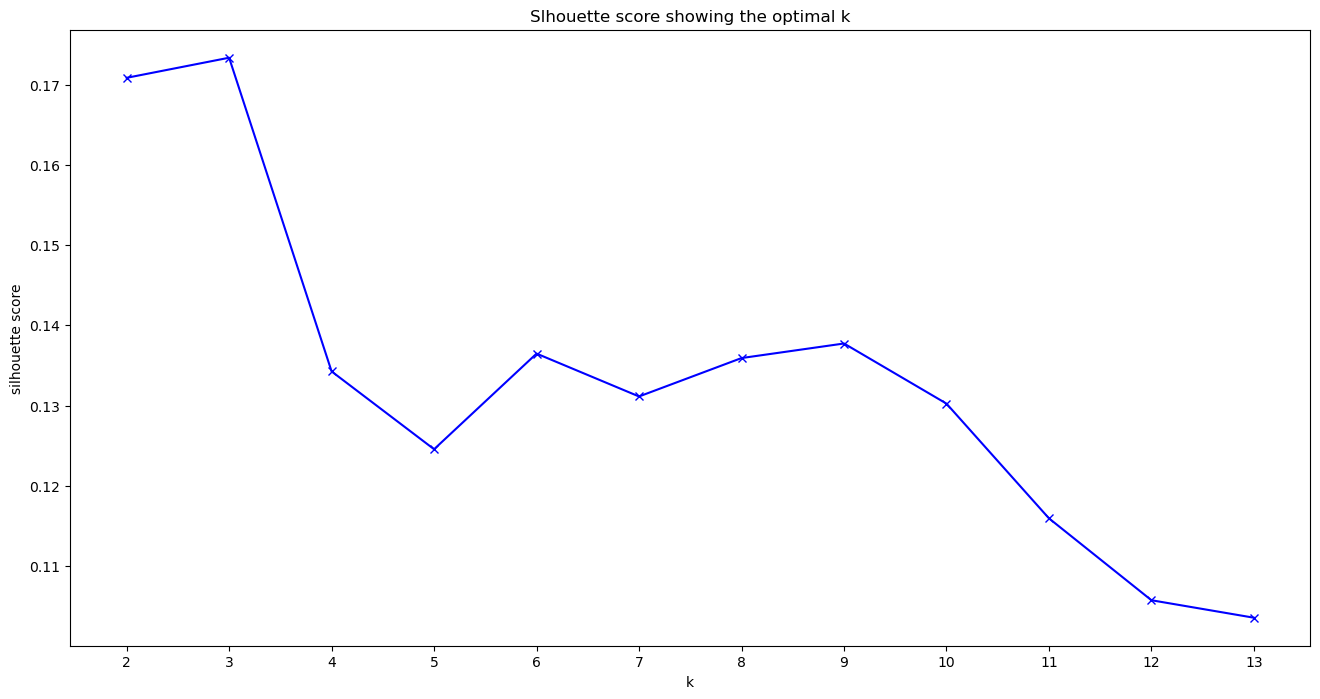

In [12]:
from sklearn.metrics import silhouette_score
K = range(2, 14)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

- Max value indicates 2 clusters would be optimal, second max value, 6 clusters and, third, 9 clusters.

 - Before running it all again, max second value was 8 as elbow method, not 4.

#### Checking KMeans with 2 and 8 clusters

##### Number of clusters = 2

In [13]:
kmeans = KMeans(n_clusters=2, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=2, random_state=1234)

In [14]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

In [15]:
# Size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    2702
1    5324
dtype: int64

In [16]:
clusters

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [17]:
#y.values
#pd.Series(y).value_counts().sort_index()

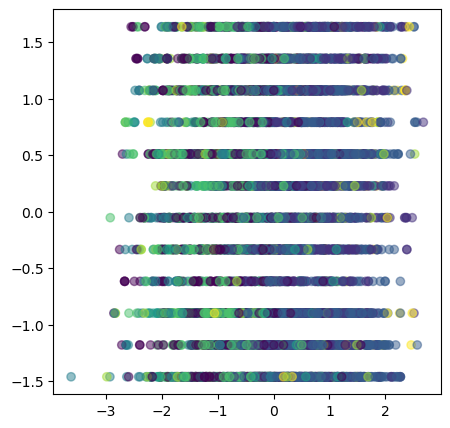

In [31]:
# Plotting (num clusters = 2)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 2], c=clusters,alpha=0.5)

plt.show()

##### Number of clusters = 8

In [19]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [20]:
# Saving kmeans model
import pickle

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [21]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

In [22]:
# Size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1569
1    1428
2    2288
3     504
4     480
5    1249
6     326
7     182
dtype: int64

In [23]:
clusters

array([0, 0, 5, ..., 0, 6, 6], dtype=int32)

In [24]:
#y.values
#pd.Series(y).value_counts().sort_index()

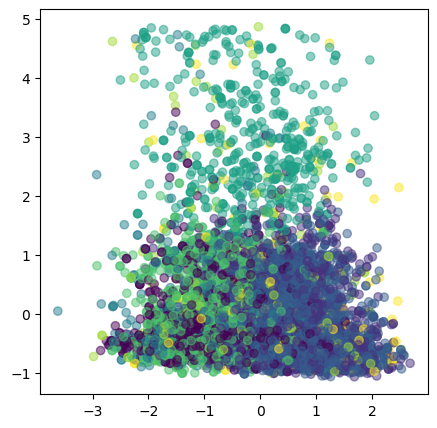

In [36]:
# Plotting (num clusters = 8)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 8], c=clusters,alpha=0.5)

plt.show()

I'm keeping 8 clusters for my KMean model

In [37]:
# Number of songs in each cluster
pd.Series(clusters).value_counts().sort_index()

0    1569
1    1428
2    2288
3     504
4     480
5    1249
6     326
7     182
dtype: int64

Now:

- Get the audio features from the input song
    - If song not in our spotify_data, search it on Spotify and get song data
    
    

- Check against the clusters built by KMeans model



- Get the segment/cluster number


In [339]:
topsongs = pd.read_csv('topsongs_data.csv', index_col =False)
spotify_data = pd.read_csv('spotify_data.csv', index_col = False )
#spotify_data = pd.read_csv('spotify_data.csv')

In [340]:
spotify_data[0:3]

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,bohemian rhapsody - remastered 2011,Queen,spotify:track:7tFiyTwD0nx5a1eklYtX2J,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,audio_features,7tFiyTwD0nx5a1eklYtX2J,https://api.spotify.com/v1/tracks/7tFiyTwD0nx5...,https://api.spotify.com/v1/audio-analysis/7tFi...,354320,4
1,roller coaster,Danny Vera,spotify:track:5B5YKjgne3TZzNpMsN9aj1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,audio_features,5B5YKjgne3TZzNpMsN9aj1,https://api.spotify.com/v1/tracks/5B5YKjgne3TZ...,https://api.spotify.com/v1/audio-analysis/5B5Y...,269986,4
2,hotel california - 2013 remaster,Eagles,spotify:track:40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,audio_features,40riOy7x9W7GXjyGp4pjAv,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,https://api.spotify.com/v1/audio-analysis/40ri...,391376,4


In [341]:
spotify_data.shape

(6806, 20)

#### Function to retrieve information of new songs from spotify

In [344]:
def get_song_from_spotify(song_searched, spotify_data):
    
    """
    The function searches for a song in the Spotify database by taking in a song name 
    and a dataframe spotify_data. If the song is not in spotify_data, it searches for
    the song in the Spotify API and extracts information such as URI and features
    of the selected song. This information is converted to a DataFrame and appended to
    spotify_data. The updated dataframe is returned, and if the song is not found,
    it returns None.
    """
    
    # If song is NOT in spotify data:
    if song_searched not in spotify_data['title'].values:
        
        # Search song
        track_id = sp.search(q='track:' + song_searched, type='track')  # song info

        # If multiple versions of song played by different artists are found:
        if len(track_id['tracks']['items']) > 1:
            # Print list of artists who played the song
            print("Multiple versions of the song '{}' were found:".format(song_searched))
            for i, item in enumerate(track_id['tracks']['items']):
                print("{}: {}".format(i+1, item['album']['artists'][0]['name']))
                
            # Ask user to select the desired version of the song
            while True:
                try:
                    selection = int(input("Please enter the NUMBER of the version you are looking for: "))
                    if selection < 1 or selection > len(track_id['tracks']['items']):
                        print("Invalid selection. Please enter a NUMBER between 1 and {}.".format(len(track_id['tracks']['items'])))
                    else:
                        break
                except ValueError:
                    print("Invalid selection. Please enter a NUMBER between 1 and {}.".format(len(track_id['tracks']['items'])))
            
            # Use the selected version of the song
            item = track_id['tracks']['items'][selection-1]
        
        else:
            # Use the only version of the song found
            item = track_id['tracks']['items'][0]
        
        # Extracting info of new song
        song_uri = item['uri']  # uri
        features = sp.audio_features(song_uri)[0]

        # New dict retrieving values of 'title', 'artist' and 'uri'
        track = {
            'title': item['name'],
            'artist': item['album']['artists'][0]['name'],
            'uri': song_uri,
        }

        # For each feature (song uri) add in track dict
        # new key (column name) and the value
        for feature_key, feature_value in features.items():
            track[feature_key] = feature_value

        # Append new songs to spotify_data
        new_song_df = pd.DataFrame([track])
        spotify_data = pd.concat([spotify_data, new_song_df], axis=0)#, ignore_index=True)
        spotify_data = spotify_data.drop_duplicates()
        #spotify_data = spotify_data.drop(['Unnamed: 0'], axis=1)
        spotify_data = spotify_data.reset_index(drop=True)
        #spotify_data.to_csv('spotify_data.csv')
        
        # Return the results as a DataFrame
        print("{} was not in spotify_data database".format(song_searched))
        return spotify_data
    
    else:
        
        print("{} was already in spotify_data database".format(song_searched))
        return spotify_data

    
        # track_name = track_id['tracks']['items'][0]['name'] # title
       # track_id['tracks']['items'][0]['album']['artists'][0]['name'] # artist band
       # song_uri = track_id['tracks']['items'][0]['uri'] # uri
       # features = sp.audio_features(song_uri)[0]
    

In [345]:
song_searched = input()
get_song_from_spotify(song_searched, spotify_data)#.reset_index(drop=True)

# Saving updated dataframe
spotify_data.to_csv('spotify_data.csv', index=False)
spotify_data

lucia
Multiple versions of the song 'lucia' were found:
1: Black Coast
2: Miguel Ríos
3: Future
4: Aldo Trujillo
5: Rimoneta
6: Christine D'Clario
7: Siempre Reinas
8: Bassjackers
9: Piero Piccioni
10: South Park Mexican
Please enter the NUMBER of the version you are looking for: 2
lucia was not in spotify_data database


,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,bohemian rhapsody - remastered 2011,Queen,spotify:track:7tFiyTwD0nx5a1eklYtX2J,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,audio_features,7tFiyTwD0nx5a1eklYtX2J,https://api.spotify.com/v1/tracks/7tFiyTwD0nx5...,https://api.spotify.com/v1/audio-analysis/7tFi...,354320,4
1,roller coaster,Danny Vera,spotify:track:5B5YKjgne3TZzNpMsN9aj1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,audio_features,5B5YKjgne3TZzNpMsN9aj1,https://api.spotify.com/v1/tracks/5B5YKjgne3TZ...,https://api.spotify.com/v1/audio-analysis/5B5Y...,269986,4
2,hotel california - 2013 remaster,Eagles,spotify:track:40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,audio_features,40riOy7x9W7GXjyGp4pjAv,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,https://api.spotify.com/v1/audio-analysis/40ri...,391376,4
3,piano man,Billy Joel,spotify:track:3FCto7hnn1shUyZL42YgfO,0.334,0.472,0,-8.791,1,0.0277,0.60000,0.000004,0.3170,0.431,179.173,audio_features,3FCto7hnn1shUyZL42YgfO,https://api.spotify.com/v1/tracks/3FCto7hnn1sh...,https://api.spotify.com/v1/audio-analysis/3FCt...,336093,3
4,fix you,Coldplay,spotify:track:7LVHVU3tWfcxj5aiPFEW4Q,0.209,0.417,3,-8.740,1,0.0338,0.16400,0.001960,0.1130,0.124,138.178,audio_features,7LVHVU3tWfcxj5aiPFEW4Q,https://api.spotify.com/v1/tracks/7LVHVU3tWfcx...,https://api.spotify.com/v1/audio-analysis/7LVH...,295533,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,de vez en cuando la vida - en directo,Joan Manuel Serrat,spotify:track:6ZamvCT3Kc154A4amDloeI,0.544,0.390,9,-8.495,1,0.0606,0.85300,0.000000,0.3970,0.166,83.941,audio_features,6ZamvCT3Kc154A4amDloeI,https://api.spotify.com/v1/tracks/6ZamvCT3Kc15...,https://api.spotify.com/v1/audio-analysis/6Zam...,195813,3
6802,de vez en cuando la vida,Joan Manuel Serrat,spotify:track:4GkEbCD0QcC2yn10cH4DSG,0.446,0.333,6,-7.707,0,0.0334,0.84400,0.000009,0.1430,0.261,78.606,audio_features,4GkEbCD0QcC2yn10cH4DSG,https://api.spotify.com/v1/tracks/4GkEbCD0QcC2...,https://api.spotify.com/v1/audio-analysis/4GkE...,211627,1
6803,where do you go to (my lovely) - re-recorded,Peter Sarstedt,spotify:track:6M665tf7ZKQzUFA5yOrUE4,0.558,0.444,2,-7.549,0,0.0345,0.28600,0.000066,0.1210,0.444,182.583,audio_features,6M665tf7ZKQzUFA5yOrUE4,https://api.spotify.com/v1/tracks/6M665tf7ZKQz...,https://api.spotify.com/v1/audio-analysis/6M66...,287720,3
6804,santa lucia - remastered 2005,Miguel Ríos,spotify:track:5bycn7SuJzYnxte0W54mNX,0.545,0.682,6,-5.931,1,0.0289,0.21300,0.000000,0.1470,0.713,102.703,audio_features,5bycn7SuJzYnxte0W54mNX,https://api.spotify.com/v1/tracks/5bycn7SuJzYn...,https://api.spotify.com/v1/audio-analysis/5byc...,224827,4


In [346]:
spotify_data.shape

(6806, 20)

#### Function to identify the cluster of the target song and reccomend another one from that cluster

# SONG RECOMMENDER

In [347]:
def recommend_song(song_searched, spotify_data, topsongs):
    """
    This function takes in a song name and a dataframe spotify_data.
    It first checks if the song is in topsongs, and if so, recommends a song from topsongs.
    If the song is not in spotify_data, the function uses Spotipy to search for the song 
    and gather information about it.
    If the song is in spotify_data or its information has already been collected,
    the function creates clusters to recommend a song from the same cluster
    as the selected song..
    """
    song_searched = song_searched.lower().strip()

    # Check if the song is in top songs:
    if song_searched in topsongs['title'].str.lower().str.strip().values:
        recommended_song = topsongs.loc[topsongs['title'].str.lower().str.strip() != song_searched].sample(n=1)
        display(Markdown(f"Based on your selection of '**{song_searched.capitalize()}**', we recommend the *hot* song '**{recommended_song['title'].iloc[0]}**' by **{recommended_song['artist'].iloc[0]}**."))
        return recommended_song#, spotify_data
    
    # Nested get_song_from_spotify function:
    spotify_data = get_song_from_spotify(song_searched, spotify_data)

    X_features = spotify_data.select_dtypes(np.number)

    # Scaling Data
    scaler = StandardScaler()
    X_prep = scaler.fit_transform(X_features)

    # KMeans : 8 clusters
    kmeans = KMeans(n_clusters=8, random_state=1234)
    kmeans.fit(X_prep)

    # Finding the index of the selected song:
    spotify_data['title'] = spotify_data['title'].str.lower().str.strip()
    song_index = spotify_data.index[spotify_data['title'] == song_searched]
    
    if len(song_index) == 0:
        print(f"No matching song found for {song_searched}")
        return None, spotify_data
    
    song_index = song_index[0]

    # Predicting cluster for the selected song:
    song_cluster = kmeans.predict(X_prep[song_index].reshape(1, -1))[0]

    # Selecting a random song from the same cluster:
    cluster_songs = spotify_data[kmeans.labels_ == song_cluster]
    recommended_song = cluster_songs.sample(n=1)

    # Print recommendation:    
    display(Markdown(f"Based on your selection of '**{song_searched.capitalize()}**', we recommend the song **'{recommended_song['title'].iloc[0].upper()}'** by **'{recommended_song['artist'].iloc[0].upper()}'**."))

    return recommended_song, spotify_data


In [348]:
song_searched = input()
recommended_song, spotify_data = recommend_song(song_searched, spotify_data, topsongs)
spotify_data.to_csv('spotify_data.csv', index=False)


que va a ser de ti
Multiple versions of the song 'que va a ser de ti' were found:
1: Thalia
2: Joan Manuel Serrat
3: Sergio Vargas
4: Roberto Carlos
5: Thalia
6: Daniel Santacruz
7: Various Artists
8: Rio Carnaval
9: Various Artists
10: Dale Q' Va
Please enter the NUMBER of the version you are looking for: 2
que va a ser de ti was not in spotify_data database


Based on your selection of '**Que va a ser de ti**', we recommend the song **'TOUS LES GARÇONS ET LES FILLES - SLOW'** by **'FRANÇOISE HARDY'**.

In [322]:
spotify_data.shape

(6805, 20)

In [323]:
spotify_data.tail(5)

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
6800,paraules d'amor,Joan Manuel Serrat,spotify:track:1J1VrZLr3FNKOMNBp0yCuH,0.275,0.334,0,-14.975,1,0.0396,0.5790,0.000384,0.989,0.257,79.248,audio_features,1J1VrZLr3FNKOMNBp0yCuH,https://api.spotify.com/v1/tracks/1J1VrZLr3FNK...,https://api.spotify.com/v1/audio-analysis/1J1V...,233560,4
6801,de vez en cuando la vida - en directo,Joan Manuel Serrat,spotify:track:6ZamvCT3Kc154A4amDloeI,0.544,0.390,9,-8.495,1,0.0606,0.8530,0.000000,0.397,0.166,83.941,audio_features,6ZamvCT3Kc154A4amDloeI,https://api.spotify.com/v1/tracks/6ZamvCT3Kc15...,https://api.spotify.com/v1/audio-analysis/6Zam...,195813,3
6802,de vez en cuando la vida,Joan Manuel Serrat,spotify:track:4GkEbCD0QcC2yn10cH4DSG,0.446,0.333,6,-7.707,0,0.0334,0.8440,0.000009,0.143,0.261,78.606,audio_features,4GkEbCD0QcC2yn10cH4DSG,https://api.spotify.com/v1/tracks/4GkEbCD0QcC2...,https://api.spotify.com/v1/audio-analysis/4GkE...,211627,1
6803,where do you go to (my lovely) - re-recorded,Peter Sarstedt,spotify:track:6M665tf7ZKQzUFA5yOrUE4,0.558,0.444,2,-7.549,0,0.0345,0.2860,0.000066,0.121,0.444,182.583,audio_features,6M665tf7ZKQzUFA5yOrUE4,https://api.spotify.com/v1/tracks/6M665tf7ZKQz...,https://api.spotify.com/v1/audio-analysis/6M66...,287720,3
6804,l’empordà,Sopa De Cabra,spotify:track:5d6mQgSMh3vetAfR0IbQKs,0.273,0.939,4,-6.911,1,0.0836,0.0243,0.002200,0.954,0.403,161.342,audio_features,5d6mQgSMh3vetAfR0IbQKs,https://api.spotify.com/v1/tracks/5d6mQgSMh3ve...,https://api.spotify.com/v1/audio-analysis/5d6m...,195048,4


### Trying Random and similar

In [367]:
def recommend_song(song_searched, spotify_data, topsongs):
    """
    This function takes in a song name and a dataframe spotify_data.
    It first checks if the song is in topsongs, and if so, recommends a song from topsongs.
    If the song is not in spotify_data, the function uses Spotipy to search for the song 
    and gather information about it.
    If the song is in spotify_data or its information has already been collected,
    the function creates clusters to recommend a song from the same cluster
    as the selected song..
    """
    song_searched = song_searched.lower().strip()

    # Check if the song is in top songs:
    if song_searched in topsongs['title'].str.lower().str.strip().values:
        recommended_song = topsongs.loc[topsongs['title'].str.lower().str.strip() != song_searched].sample(n=1)
        display(Markdown(f"Based on your selection of '**{song_searched.capitalize()}**', we recommend the *hot* song '**{recommended_song['title'].iloc[0]}**' by **{recommended_song['artist'].iloc[0]}**."))
        return recommended_song#, spotify_data
    
    # Nested get_song_from_spotify function:
    spotify_data = get_song_from_spotify(song_searched, spotify_data)

    X_features = spotify_data.select_dtypes(np.number)

    # Scaling Data
    scaler = StandardScaler()
    X_prep = scaler.fit_transform(X_features)

    # KMeans : 8 clusters
    kmeans = KMeans(n_clusters=8, random_state=1234)
    kmeans.fit(X_prep)

    # Finding the index of the selected song:
    spotify_data['title'] = spotify_data['title'].str.lower().str.strip()
    song_index = spotify_data.index[spotify_data['title'] == song_searched]
    
    if len(song_index) == 0:
        print(f"No matching song found for {song_searched}")
        return None, spotify_data
    
    song_index = song_index[0]

    # Predicting cluster for the selected song:
    song_cluster = kmeans.predict(X_prep[song_index].reshape(1, -1))[0]

    # Selecting a random song from the same cluster:
    cluster_songs = spotify_data[kmeans.labels_ == song_cluster]
    recommended_song = cluster_songs.sample(n=1)
    
    # Finding most similar song based on cosine similarity:
    X_searched = X_prep[song_index].reshape(1, -1)
    similarities = cosine_similarity(X_searched, X_prep)
    sim_indices = similarities.argsort()[0][::-1][1:]
    sim_cluster_songs = spotify_data.iloc[sim_indices][kmeans.labels_[sim_indices] == song_cluster]
    similar_song = sim_cluster_songs.iloc[0]

    # Print both recommendations:
    display(Markdown(f"The most similar song to '**{song_searched.capitalize()}**' is:\n\n**'{similar_song['title'].upper()}'** by **'{similar_song['artist'].upper()}'**.")) 
    display(Markdown(f"If you're a fan of '**{song_searched.capitalize()}**', you might like:\n\n**'{recommended_song['title'].iloc[0].upper()}'** by **'{recommended_song['artist'].iloc[0].upper()}'**.\n\nIt may not be the most similar, but who knows? You might discover your new favorite song!"))
        
    
    
    # Print recommendation:    
    #display(Markdown(f"Based on your selection of '**{song_searched.capitalize()}**', we recommend the song **'{recommended_song['title'].iloc[0].upper()}'** by **'{recommended_song['artist'].iloc[0].upper()}'**."))

    return recommended_song, spotify_data


In [368]:
song_searched = input()
recommend_song(song_searched, spotify_data, topsongs)
spotify_data.to_csv('spotify_data.csv', index=False)


que va a ser de ti
que va a ser de ti was already in spotify_data database


The most similar song to '**Que va a ser de ti**' is:

**'CALYPSO'** by **'JOHN DENVER'**.

If you're a fan of '**Que va a ser de ti**', you might like:

**'SWING YOUR DADDY'** by **'JIM GILSTRAP'**.

It may not be the most similar, but who knows? You might discover your new favorite song!

# Trying with URL

In [377]:
from youtubesearchpython import VideosSearch

def recommend_song(song_searched, spotify_data, topsongs):
    """
    This function takes in a song name and a dataframe spotify_data.
    It first checks if the song is in topsongs, and if so, recommends a song from topsongs.
    If the song is not in spotify_data, the function uses Spotipy to search for the song 
    and gather information about it.
    If the song is in spotify_data or its information has already been collected,
    the function creates clusters to recommend a song from the same cluster
    as the selected song.
    """
    song_searched = song_searched.lower().strip()

    # Check if the song is in top songs:
    if song_searched in topsongs['title'].str.lower().str.strip().values:
        recommended_song = topsongs.loc[topsongs['title'].str.lower().str.strip() != song_searched].sample(n=1)
        display(Markdown(f"Based on your selection of '**{song_searched.capitalize()}**', we recommend the *hot* song '**{recommended_song['title'].iloc[0]}**' by **{recommended_song['artist'].iloc[0]}**."))
        return recommended_song, spotify_data
    
    # Nested get_song_from_spotify function:
    spotify_data = get_song_from_spotify(song_searched, spotify_data)

    X_features = spotify_data.select_dtypes(np.number)

    # Scaling Data
    scaler = StandardScaler()
    X_prep = scaler.fit_transform(X_features)

    # KMeans : 8 clusters
    kmeans = KMeans(n_clusters=8, random_state=1234)
    kmeans.fit(X_prep)

    # Finding the index of the selected song:
    spotify_data['title'] = spotify_data['title'].str.lower().str.strip()
    song_index = spotify_data.index[spotify_data['title'] == song_searched]
    
    if len(song_index) == 0:
        print(f"No matching song found for {song_searched}")
        return None, spotify_data
    
    song_index = song_index[0]

    # Predicting cluster for the selected song:
    song_cluster = kmeans.predict(X_prep[song_index].reshape(1, -1))[0]

    # Selecting a random song from the same cluster:
    cluster_songs = spotify_data[kmeans.labels_ == song_cluster]
    recommended_song = cluster_songs.sample(n=1)
    
    # Finding most similar song based on cosine similarity:
    X_searched = X_prep[song_index].reshape(1, -1)
    similarities = cosine_similarity(X_searched, X_prep)
    sim_indices = similarities.argsort()[0][::-1][1:]
    sim_cluster_songs = spotify_data.iloc[sim_indices][kmeans.labels_[sim_indices] == song_cluster]
    similar_song = sim_cluster_songs.iloc[0]

    # Get YouTube links for both recommended songs
    search_results = VideosSearch(f"{similar_song['title']} {similar_song['artist']}", limit=1).result()["result"]
    similar_song_url = search_results[0]["link"]
    search_results = VideosSearch(f"{recommended_song['title'].iloc[0]} {recommended_song['artist'].iloc[0]}", limit=1).result()["result"]
    recommended_song_url = search_results[0]["link"]

    # Print both recommendations and their URLs
    display(Markdown(f"The most similar song to '**{song_searched.capitalize()}**' is:\n\n**'{similar_song['title'].upper()}'** by **'{similar_song['artist'].upper()}'**."))
    display(Markdown(f"URL: {similar_song_url}"))
    #display(Markdown(f"[**URL**]({similar_song_url})\n"))

    display(Markdown(f"If you're a fan of '**{song_searched.capitalize()}**', you might like:\n\n**'{recommended_song['title'].iloc[0].upper()}'** by **'{recommended_song['artist'].iloc[0].upper()}'**.\n\nIt may not be the most similar, but who knows? You might discover your new favorite song!"))
    display(Markdown(f"URL: {recommended_song_url}"))
    #display(Markdown(f"[**URL**]({recommended_song_url})\n"))

In [378]:
song_searched = input()
recommend_song(song_searched, spotify_data, topsongs)
spotify_data.to_csv('spotify_data.csv', index=False)


que va a ser de ti
que va a ser de ti was already in spotify_data database


The most similar song to '**Que va a ser de ti**' is:

**'CALYPSO'** by **'JOHN DENVER'**.

URL: https://www.youtube.com/watch?v=q3EE83q6tzw

If you're a fan of '**Que va a ser de ti**', you might like:

**'NIGHTPORTER - REMASTERED 2003'** by **'JAPAN'**.

It may not be the most similar, but who knows? You might discover your new favorite song!

URL: https://www.youtube.com/watch?v=gYs8SWr9GA8

In [369]:
from youtubesearchpython import VideosSearch

# Search for the most similar song
search_results = VideosSearch(f"{similar_song['title']} {similar_song['artist']}", limit=1).result()["result"]

# Get the video URL
similar_song_url = search_results[0]["link"]

# Print the video URL
print(similar_song_url)

# Search for the recommended song
search_results = VideosSearch(f"{recommended_song['title'].iloc[0]} {recommended_song['artist'].iloc[0]}", limit=1).result()["result"]

# Get the video URL
recommended_song_url = search_results[0]["link"]

# Print the video URL
print(recommended_song_url)

NameError: name 'similar_song' is not defined